# Oil Pipeline Accidents Analysis
The objective of this analysis is to examine a dataset containing records of oil pipeline leaks and spills reported to the Pipeline and Hazardous Materials Safety Administration since 2010. The dataset provides valuable information about each incident, including the date and time of the accident, the operator and pipeline involved, the cause of the incident, the type of hazardous liquid released, the quantity lost, injuries and fatalities, and associated costs.

By analyzing this dataset, we aim to gain insights into the patterns, trends, and factors contributing to oil pipeline accidents. This information can be crucial for understanding the safety and environmental implications of pipeline operations, as well as identifying areas for improvement in preventing and mitigating such incidents.

The dataset was collected and published by the Department of Transportation's Pipeline and Hazardous Materials Safety Administration, ensuring the reliability and authenticity of the reported information. With this dataset as our foundation, we will explore various aspects of the pipeline accidents, investigate their causes, assess the extent of damage and costs incurred, and examine any other relevant factors that may shed light on the overall impact of these incidents.

By conducting this analysis, we aim to provide valuable insights that can inform policymakers, pipeline operators, and other stakeholders involved in ensuring the safety and sustainability of oil pipeline infrastructure.

In [1]:
# import modules
import calendar
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt



## 1. Data Loading and Exploration

In [2]:

# Read the dataset
df = pd.read_csv('database.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get the dimensions of the dataset
print("\nDataset dimensions:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Check the data types of each column
print("\nData types of the columns:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Get summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())



First few rows of the dataset:
   Report Number  Supplemental Number  Accident Year Accident Date/Time  \
0       20100016                17305           2010   1/1/2010 7:15 AM   
1       20100254                17331           2010   1/4/2010 8:30 AM   
2       20100038                17747           2010  1/5/2010 10:30 AM   
3       20100260                18574           2010   1/6/2010 7:30 PM   
4       20100030                16276           2010   1/7/2010 1:00 PM   

   Operator ID                         Operator Name Pipeline/Facility Name  \
0        32109                 ONEOK NGL PIPELINE LP      KINDER MORGAN JCT   
1        15786                PORTLAND PIPELINE CORP      24-INCH MAIN LINE   
2        20160           PETROLOGISTICS OLEFINS, LLC                    NaN   
3        11169  ENBRIDGE ENERGY, LIMITED PARTNERSHIP      SUPERIOR TERMINAL   
4          300                 PLAINS PIPELINE, L.P.         RED RIVER EAST   

  Pipeline Location Pipeline Type          

### Pipeline Accidents Dataset

The Pipeline Accidents dataset contains information about pipeline accidents that have occurred in the United States. The dataset provides details on various aspects of the accidents, including the accident date and time, operator information, location, cause of the accident, injuries and fatalities, property damage costs, and other related information.
Dataset Overview

- Number of rows: 2795
- Number of columns: 48

#### Key Features

Some of the key features of the dataset include:

- Report Number: A unique identifier for each accident report.
- Accident Year: The year in which the accident occurred.
- Accident Date/Time: The date and time of the accident.
- Operator Name: The name of the pipeline operator involved in the accident.
- Pipeline/Facility Name: The name of the pipeline or facility associated with the accident.
- Pipeline Location: Indicates whether the pipeline is located onshore or offshore.
- Pipeline Type: The type of pipeline (e.g., aboveground, underground).
- Liquid Type: The type of liquid involved in the accident (e.g., crude oil, flammable/toxic fluid).
- Accident City, County, and State: The location of the accident (city, county, and state).
- Accident Latitude and Longitude: The geographical coordinates of the accident location.
- Cause Category and Subcategory: The categorization of the cause of the accident.
- Injuries and Fatalities: Information on injuries and fatalities associated with the accident.
- Property Damage Costs: The costs of property damage resulting from the accident.
- Other Costs: Other costs incurred due to the accident.
- All Costs: The total costs associated with the accident.

#### Missing Values

The dataset contains missing values in some columns, such as Pipeline/Facility Name, Pipeline Type, Liquid Subtype, and others. The number of missing values varies across columns.

### Summary Statistics

The summary statistics provide a statistical overview of numeric columns in the dataset, including measures such as count, mean, standard deviation, minimum, maximum, and quartiles for relevant features.

## 2. Data Visualization

### Where are the accident?

To begin with, the dataset includes a location column that denotes whether the accident occurred offshore or onshore. 

<Figure size 576x432 with 0 Axes>

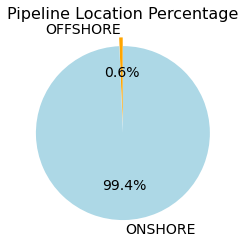

In [3]:
# Adjust the figure size and fontsize
plt.figure(figsize=(8, 6))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

# Calculate the percentage of "OFFSHORE" and "ONSHORE"
total_count = len(df)
offshore_count = df['Pipeline Location'].value_counts().get('OFFSHORE', 0)
onshore_count = df['Pipeline Location'].value_counts().get('ONSHORE', 0)

offshore_percentage = (offshore_count / total_count) * 100
onshore_percentage = (onshore_count / total_count) * 100

# Create a pie chart to visualize the percentages
labels = ['OFFSHORE', 'ONSHORE']
sizes = [offshore_percentage, onshore_percentage]
colors = ['orange', 'lightblue']
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       startangle=90, textprops={'fontsize': 14})
ax.set_aspect('equal')
ax.set_title('Pipeline Location Percentage', fontsize=16)


plt.savefig('graphs/Pipeline_Location_Percentage.png', dpi=300)

plt.show()


Due to less than 1% of the data focusing on offshore accidents, this dataset is not suitable for conducting a meaningful comparison between offshore and onshore accidents.

Let's looks where are located the accident: 

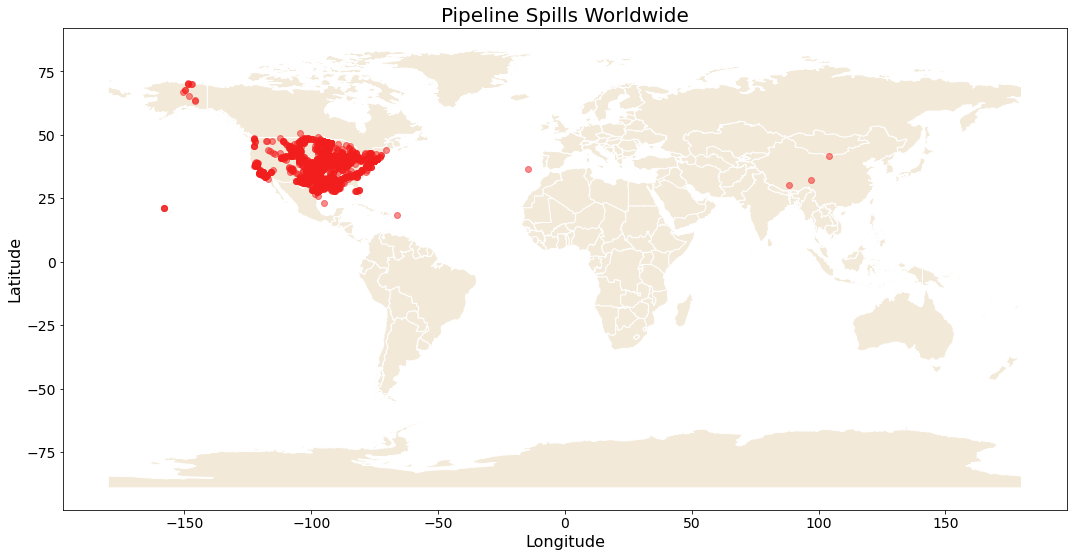

In [4]:
# Read the shapefile for world country boundaries
world_countries = gpd.read_file('World_Countries_Generalized/World_Countries_Generalized.shp')

# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(18, 12))

# Plot the world country boundaries with customized colors and edge color
world_countries.plot(ax=ax, facecolor='#F2E9D8', edgecolor='white', linewidth=1)

# Add the spill locations as a scatter plot with customized color
ax.scatter(df['Accident Longitude'], df['Accident Latitude'], color='#F21D1D', alpha=0.5)

# Set the title and axis labels
ax.set_title('Pipeline Spills Worldwide')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the font size of the title and axis labels
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.savefig("graphs/Pipeline_Spill_Locations.png",dpi=300)
# Show the plot

plt.show()


The majority of accidents in the dataset are concentrated in the United States. Consequently, for the remaining analysis, particular emphasis will be placed on the US, particularly when visualizations involve maps.

### Which companies are the most affected?

Let's examine which companies have been most impacted by accidents since 2010, as represented in this dataset. 

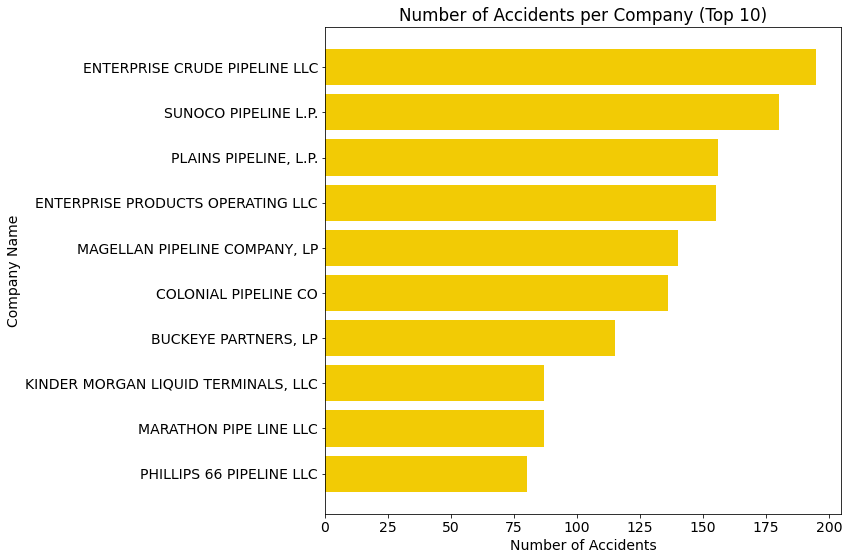

In [5]:
# Get the top 10 companies with the most accidents
top_10_companies = df['Operator Name'].value_counts().nlargest(10)

# Create a bar plot for the number of accidents per company
plt.figure(figsize=(12, 8))
plt.barh(top_10_companies.index, top_10_companies.values, color="#F2CB05")

# Add labels and title
plt.xlabel('Number of Accidents')
plt.ylabel('Company Name')
plt.title('Number of Accidents per Company (Top 10)')

# Invert the y-axis to show the highest count at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.savefig('graphs/Number_of_Accidents_Top_10_Companies.png', dpi=300)
plt.show()


### What about the cost?

Analyzing the cost data in this dataset provides valuable insights into the financial impact of pipeline spills. It helps quantify the economic consequences, assess risks, allocate resources effectively, ensure regulatory compliance, and drive industry improvement. 

In [6]:
columns_to_convert = ['All Costs', 'Property Damage Costs', 'Lost Commodity Costs',
                      'Public/Private Property Damage Costs', 'Emergency Response Costs',
                      'Environmental Remediation Costs', 'Other Costs']

# Convert the monetary columns to millions
df[columns_to_convert] = df[columns_to_convert] / 1000000

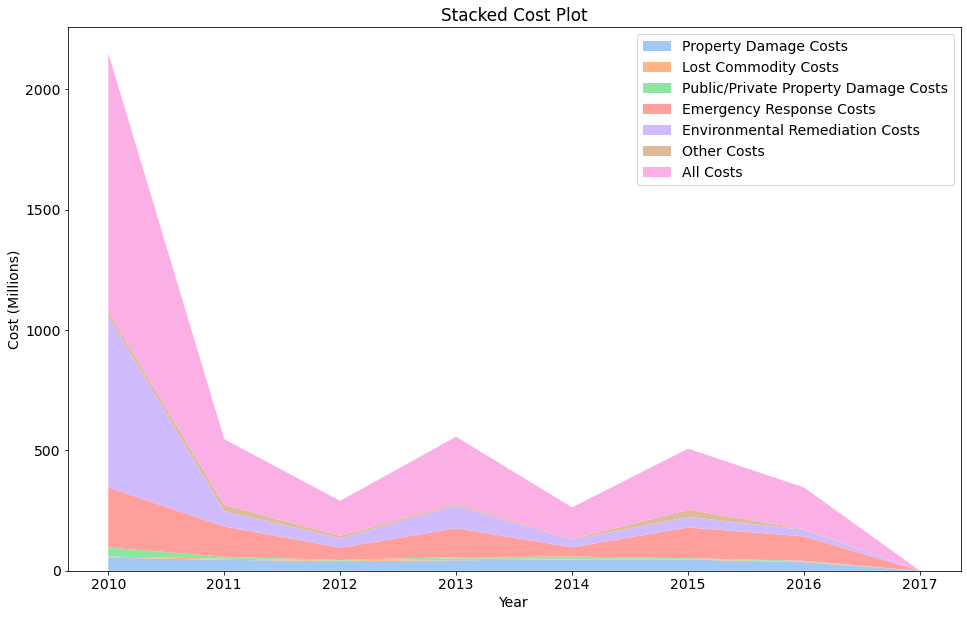

In [7]:
# Adjust the figure size and fontsize
plt.figure(figsize=(16,10))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

# Define the columns to plot
cost_columns = ['Property Damage Costs', 'Lost Commodity Costs',
                'Public/Private Property Damage Costs', 'Emergency Response Costs',
                'Environmental Remediation Costs', 'Other Costs','All Costs']

# Group the data by year and calculate the total cost for each year
grouped_data = df.groupby('Accident Year')[cost_columns].sum()

# Create a pastel palette
colors = sns.color_palette('pastel', len(cost_columns))

# Create a stacked plot
plt.stackplot(grouped_data.index, grouped_data.values.T, labels=cost_columns, colors=colors)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cost (Millions)')
plt.title('Stacked Cost Plot')

# Add legend
plt.legend(loc='upper right')

# Save the plot as an image
plt.savefig('graphs/Stacked_Cost_Plot.png', dpi=300)

# Show the plot
plt.show()


840.526118


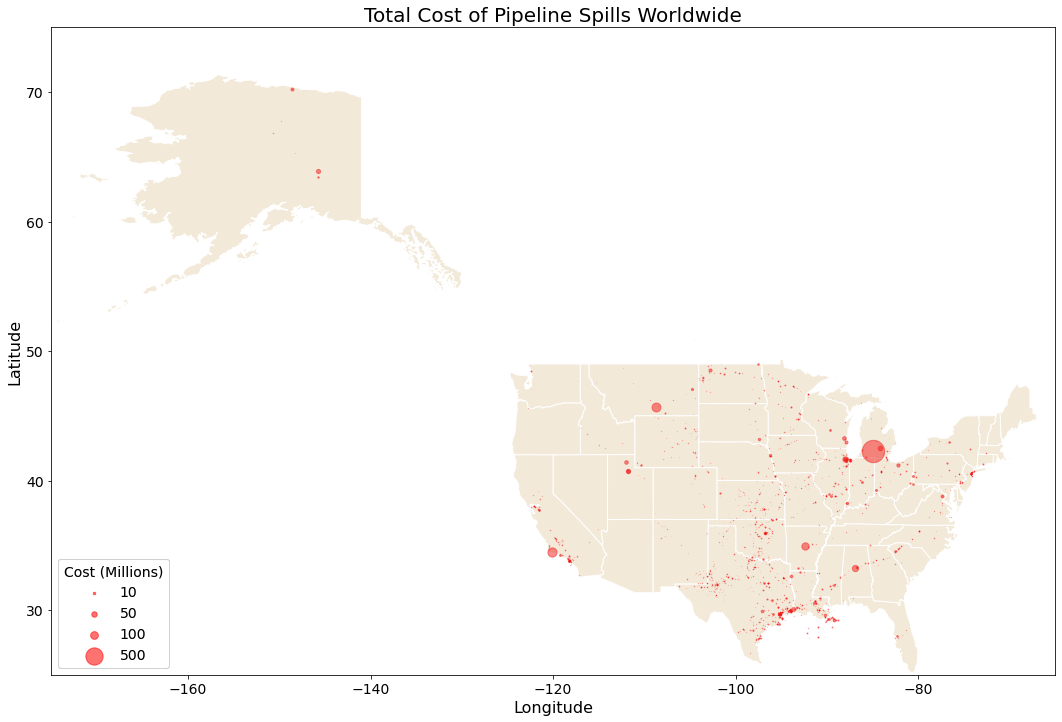

In [8]:
# Read the shapefile for world country boundaries
world_countries = gpd.read_file('States_shapefile/States_shapefile.shp')

# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(18, 12))

# Plot the world country boundaries with customized colors and edge color
world_countries.plot(ax=ax, facecolor='#F2E9D8', edgecolor='white', linewidth=1)

# Calculate the maximum cost for scaling the dot sizes
max_cost = df['All Costs'].max()
print(df['All Costs'].max())

# Plot the spill locations as scatter plot with dot sizes proportional to the cost
for _, row in df.iterrows():
    x = row['Accident Longitude']
    y = row['Accident Latitude']
    cost = row['All Costs']
    ax.scatter(x, y, s=cost / max_cost * 500, color='#F21D1D', alpha=0.5)

# Set the title and axis labels
ax.set_title('Total Cost of Pipeline Spills Worldwide')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-175,-65)
ax.set_ylim(25,75)

# Set the font size of the title and axis labels
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

# Create a custom legend for the dot sizes
sizes = [10, 50, 100, 500]  
labels = ['10', '50', '100', '500']  
legend_markers = [plt.scatter([], [], s=size / max_cost * 500, color='red', alpha=0.5)
                  for size in sizes]
legend = ax.legend(legend_markers, labels, title='Cost (Millions)',
                   loc='lower left', fontsize='medium', frameon=True)
ax.add_artist(legend)


# Show the plot
plt.savefig("graphs/Pipeline_Spill_Cost_Map.png", dpi=300)
plt.show()


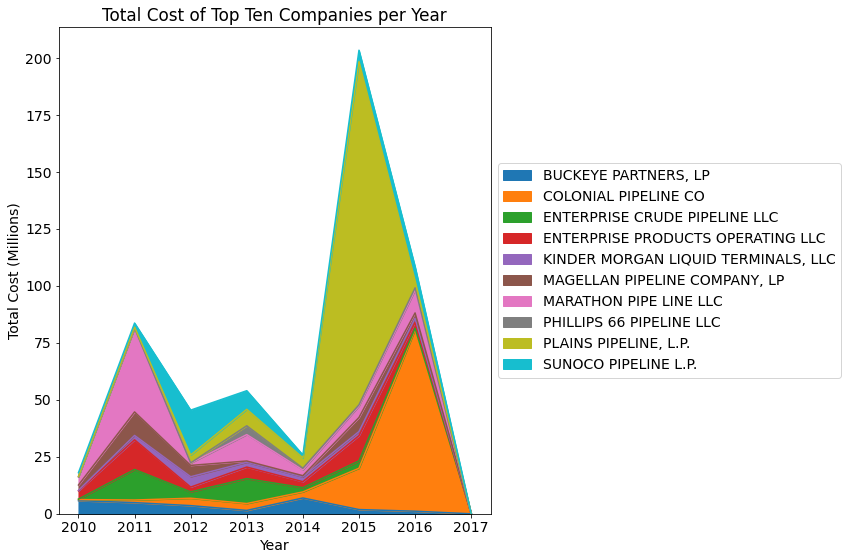

In [9]:
# Filter the dataframe for the top ten companies
top_ten_companies = df['Operator Name'].value_counts().nlargest(10).index
filtered_df = df[df['Operator Name'].isin(top_ten_companies)]

# Group the filtered data by year and calculate the total cost for each year and company
grouped_data = filtered_df.groupby(['Accident Year', 'Operator Name'])['All Costs'].sum().reset_index()

# Pivot the data to have each company as a separate column
pivoted_data = grouped_data.pivot(index='Accident Year', columns='Operator Name', values='All Costs')

# Create a stacked area plot
pivoted_data.plot(kind='area', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Cost (Millions)')
plt.title('Total Cost of Top Ten Companies per Year')

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.tight_layout()
plt.savefig('graphs/Total_Cost_Top_Ten_Companies.png', dpi=300)
plt.show()


### What about the lost in barrel ?

Analyzing the barrel loss data in this dataset provides crucial insights into the volume of product lost during pipeline spills. It helps evaluate the environmental impact, assess safety risks, implement preventive measures, optimize response strategies, and enhance overall pipeline integrity. Understanding the magnitude of barrel loss enables stakeholders to make informed decisions and take appropriate actions to minimize future losses and protect natural resources.

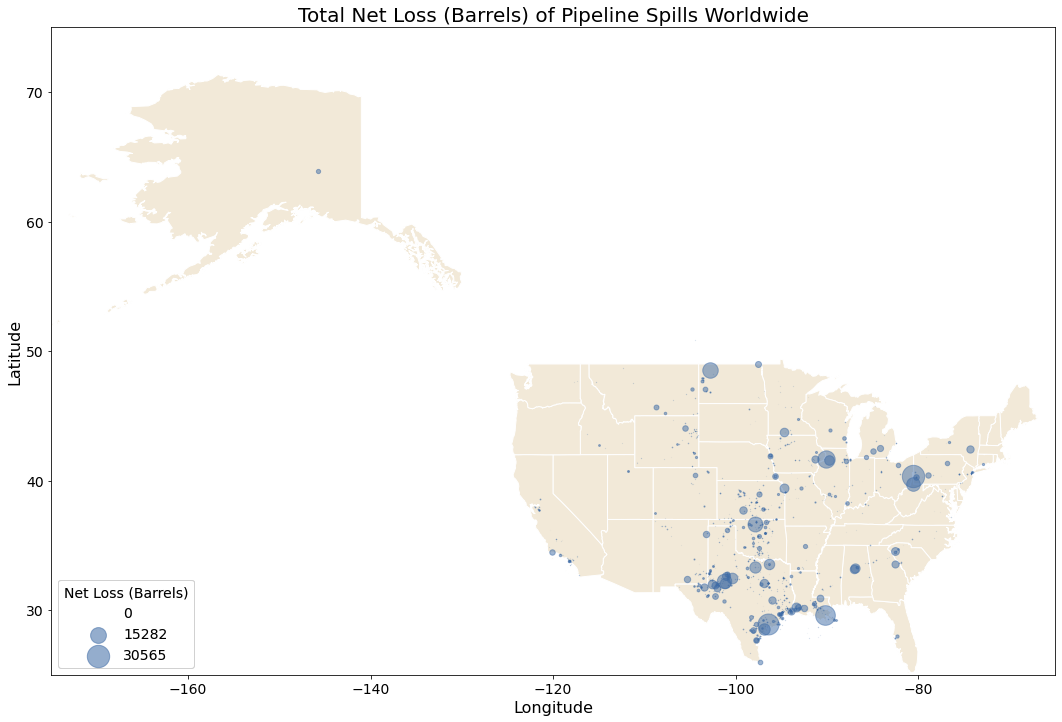

In [10]:
# Read the shapefile for world country boundaries
world_countries = gpd.read_file('States_shapefile/States_shapefile.shp')

# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(18, 12))

# Plot the world country boundaries with customized colors and edge color
world_countries.plot(ax=ax, facecolor='#F2E9D8', edgecolor='white', linewidth=1)

# Calculate the maximum and minimum Net Loss (Barrels) for scaling the dot sizes
max_loss = df['Net Loss (Barrels)'].max()
min_loss = df['Net Loss (Barrels)'].min()

# Plot the spill locations as scatter plot with dot sizes proportional to the Net Loss (Barrels)
for _, row in df.iterrows():
    x = row['Accident Longitude']
    y = row['Accident Latitude']
    loss = row['Net Loss (Barrels)']
    size = (loss - min_loss) / (max_loss - min_loss) * 500  # Scale the size based on min and max values
    ax.scatter(x, y, s=size, color='#3F6CA6', alpha=0.5)

# Set the title and axis labels
ax.set_title('Total Net Loss (Barrels) of Pipeline Spills Worldwide')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-175, -65)
ax.set_ylim(25, 75)

# Set the font size of the title and axis labels
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

# Create a custom legend for the dot sizes using min and max values
sizes = [min_loss,(min_loss + max_loss)/2, max_loss]  
labels = [round(min_loss),round((min_loss + max_loss)/2),round(max_loss)]  
legend_markers = [plt.scatter([], [], s=(size - min_loss) / (max_loss - min_loss) * 500,
                              color='#3F6CA6', alpha=0.5)
                  for size in sizes]
legend = ax.legend(legend_markers, labels, title='Net Loss (Barrels)',
                   loc='lower left', fontsize='medium', frameon=True)
ax.add_artist(legend)

# Show the plot
plt.savefig("graphs/Total_Net_Loss_Map.png", dpi=300)
plt.show()


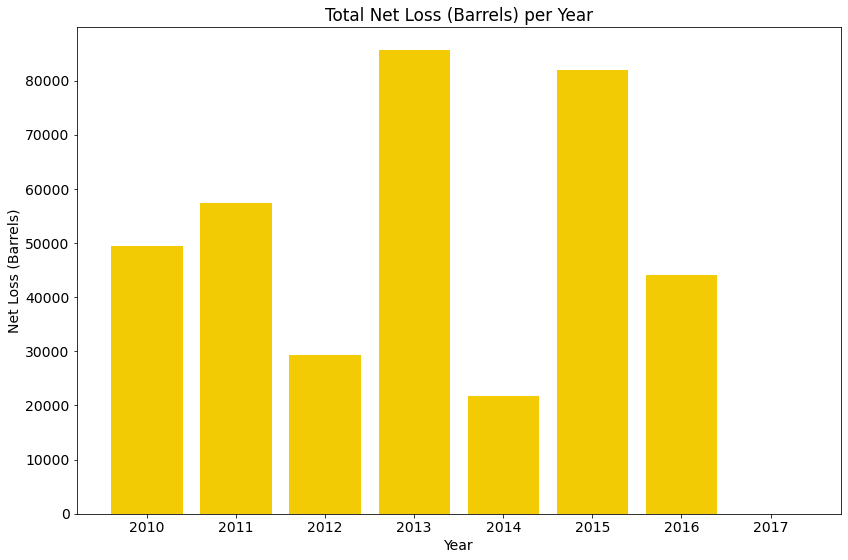

In [12]:
# Group the data by year and calculate the total Net Loss (Barrels) for each year
grouped_data = df.groupby('Accident Year')['Net Loss (Barrels)'].sum()

# Create a bar plot for the Net Loss (Barrels) per year
plt.figure(figsize=(12, 8))
plt.bar(grouped_data.index, grouped_data.values, color="#F2CB05")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Net Loss (Barrels)')
plt.title('Total Net Loss (Barrels) per Year')

# Show the plot
plt.tight_layout()
plt.savefig('graphs/Total_Net_Loss.png', dpi=300)
plt.show()


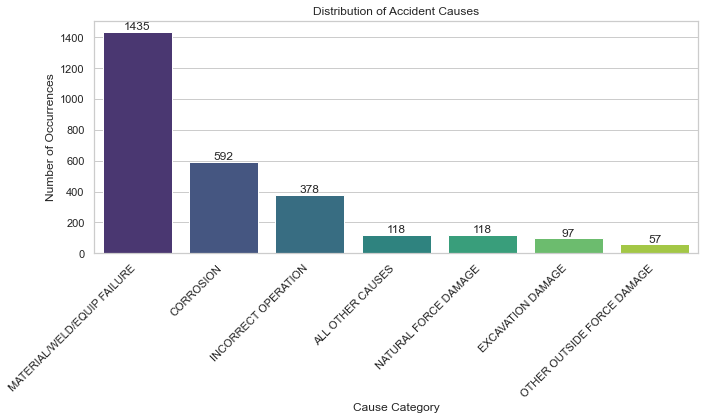

In [13]:
# Count the occurrences of each cause category
cause_counts = df['Cause Category'].value_counts()

# Create a bar plot with a fancy style using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Cause Category')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Accident Causes')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add data labels on top of each bar
for i, count in enumerate(cause_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.savefig('graphs/Distribution_of_Accident_Causes.png', dpi=300)
plt.show()


The most predominant reason for the accident includes equipment failure.

### Is there a period in the day, month or year that accident are more likely to happend ?

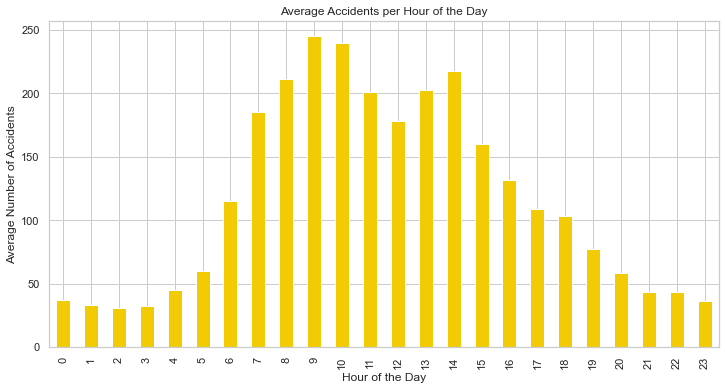

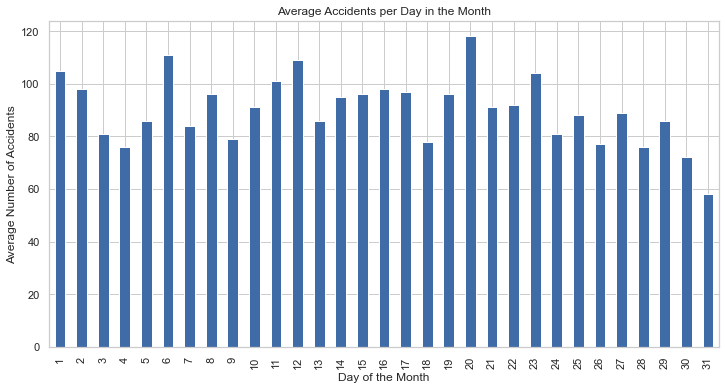

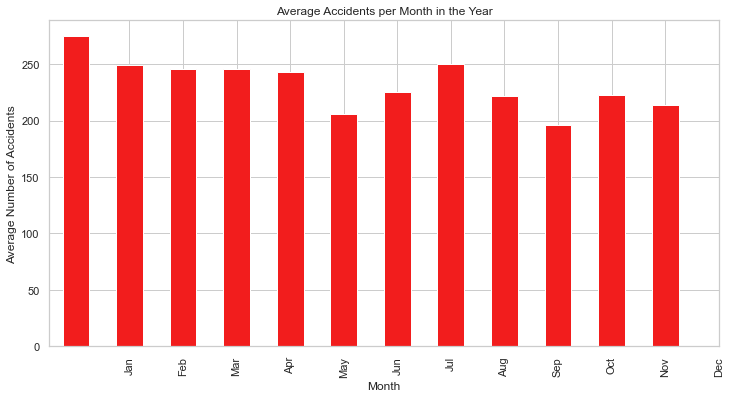

In [14]:
# Convert the 'Accident Date/Time' column to datetime format
df['Accident Date/Time'] = pd.to_datetime(df['Accident Date/Time'], format='%m/%d/%Y %I:%M %p')

# Extract hour, day, and month information
df['Hour'] = df['Accident Date/Time'].dt.hour
df['Day'] = df['Accident Date/Time'].dt.day
df['Month'] = df['Accident Date/Time'].dt.month

# Calculate the average number of accidents per hour
average_per_hour = df.groupby('Hour')['Report Number'].count().mean()

# Calculate the average number of accidents per day in the month
average_per_day = df.groupby('Day')['Report Number'].count().mean()

# Calculate the average number of accidents per month in the year
average_per_month = df.groupby('Month')['Report Number'].count().mean()

# Plotting average accidents per hour
plt.figure(figsize=(12, 6))
df.groupby('Hour')['Report Number'].count().plot(kind='bar', color='#F2CB05')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Accidents')
plt.title('Average Accidents per Hour of the Day')
plt.savefig('graphs/Average_Accidents_Per_Hour.png', dpi=300)
plt.show()

# Plotting average accidents per day in the month
plt.figure(figsize=(12, 6))
df.groupby('Day')['Report Number'].count().plot(kind='bar', color='#3F6CA6')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Accidents')
plt.title('Average Accidents per Day in the Month')
plt.savefig('graphs/Average_Accidents_Per_Day.png', dpi=300)
plt.show()

# Plotting average accidents per month in the year
plt.figure(figsize=(12, 6))

# Customize month order
month_order = list(range(1, 13))
month_labels = [calendar.month_name[i][:3] for i in month_order]

df.groupby('Month')['Report Number'].count().plot(kind='bar', color='#F21D1D')
plt.xlabel('Month')
plt.ylabel('Average Number of Accidents')
plt.title('Average Accidents per Month in the Year')

plt.xticks(month_order, month_labels)  # Set custom tick positions and labels

plt.savefig('graphs/Average_Accidents_Per_Month.png', dpi=300)
plt.show()


The analysis of the accident data suggests that, on average, the number of accidents remains relatively consistent throughout the year and across different months. However, when considering the daily scale, there is an observable trend indicating a higher number of accidents between 6 AM and 6 PM. This pattern may be attributed to various factors, such as increased human activity, rush hour traffic, or working hours when operational activities are at their peak. To gain further insights into the causes of accidents and their relationship with the time of day, mapping the accident causes alongside the corresponding time periods could provide valuable information. By visually representing the spatial distribution of accident causes and their occurrence during different times of the day, patterns and correlations may emerge, shedding light on potential factors contributing to accidents during specific time periods. Such analysis can help identify hotspots, time-sensitive risk factors, and inform targeted preventive measures and safety strategies.